In [4]:
%load_ext autoreload
%autoreload 2
%load_ext jupyternotify
import numpy as np 
from sets import Set
from conf_ope_rl import * 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


# Windy gridworld setup

In [5]:
P_u0, R_u0 = grid_world_example()
[nA, nS,nS] = P_u0.shape
nU = 2
# make reward array
bad_Rwd = -0.3
living_Rwd = -0.1
R_u0_vec = np.asarray([living_Rwd, bad_Rwd, bad_Rwd, 
      living_Rwd  , living_Rwd, bad_Rwd, 
       bad_Rwd, bad_Rwd, 1])
R_u0 = np.zeros([nS,nA]); 
for a in range(nA): 
    R_u0[:,a] = R_u0_vec

# repeat for all actions

P_u1, R_u1 = westward_wind_grid_world_example()

P_u1
print R_u1.shape
nU = 2
nS = 3*3
P_su = np.zeros([nS*nU, nA ,nS*nU])
P_su_mdptoolbox = np.zeros([nA , nS*nU, nS*nU])
Ps = [P_u0, P_u1]
for a_ind in range(nA): 
    for i_s in range(nS): 
        for i_sprime in range(nS): 
            for i_u in range(nU): 
                P_su[ i_s*nU + i_u,a_ind, i_sprime*nU:(i_sprime*nU+nU)] = Ps[i_u][a_ind, i_s, i_sprime]/nU
                P_su_mdptoolbox[ a_ind, i_s*nU + i_u, i_sprime*nU:(i_sprime*nU+nU)] = Ps[i_u][a_ind, i_s, i_sprime]/nU


(2, 2)
(2, 2)
(9, 4)


NameError: name 'vi' is not defined

## Obtain policies

In [6]:

                
import mdptoolbox.example
# P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P_u0, R_u0, 0.99)
vi.run()
pi_opt_s = vi.policy # result is (0, 0, 0)
pi_opt_s
pi_opt_s_ = np.zeros([nA, nS*nU])
for s in range(nS): 
    pi_opt_s_[pi_opt_s[s],s*nU] = 1
    pi_opt_s_[pi_opt_s[s],s*nU+1 ] = 1
print pi_opt_s
uniform_pi = np.ones([nA, nS*nU])*1.0 / (nA)
print uniform_pi
print pi_opt_s_

print np.round(pi_opt_s_,2)

vi = mdptoolbox.mdp.ValueIteration(P_u0*0.5+0.5*P_u1, R_u0, 0.99)
vi.run()
pi_opt_smarg = vi.policy # result is (0, 0, 0)
pi_opt_smarg_ = np.zeros([nA, nS*nU])
for s in range(nS): 
    pi_opt_smarg_[pi_opt_smarg[s],s*nU] = 1
    pi_opt_smarg_[pi_opt_smarg[s],s*nU+1 ] = 1

R_su = np.repeat(R_u0, 2 ).reshape([nS*nU, nA])
vi = mdptoolbox.mdp.ValueIteration(P_su_mdptoolbox, R_su, 0.99)
vi.run()
pi_opt_su = vi.policy # result is (0, 0, 0)
pi_opt_su
pi_opt_su_ = np.zeros([nA, nS*nU])
for su in range(nS*nU): 
    pi_opt_su_[pi_opt_su[su],su] = 1

(1, 1, 1, 3, 1, 1, 3, 3, 0)
[[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]]


## Renaming quantities

In [7]:

# pi_opt_s_ optimal on state space s 
# pi_opt_su optimal on state space, unobserved state space U 

# Assume Suboptimal behavior policy 
mu_mix_behavior = 0.15
Pi = mu_mix_behavior*pi_opt_su_ + (1-mu_mix_behavior)*uniform_pi
nS = pi_opt_su_.shape[1] 
P = np.zeros([nS, nA, nS ])
# print p_e_su
P = P_su
state_dist = np.ones(nS)/nS
n = 40000
# get evaluation policy 

In [8]:
tight = False
# def get_full_agg_w_densratio( gamma, nS, nA, nU, P, Pi, p_e_su, state, n ): 
nSmarg = nS / nU


## Generate data

In [102]:
%%notify

from joblib import Parallel, delayed

tight = True; quiet = True; sense_min = False
ngams = 5
logGams_full = np.linspace(0.2, 1.7, ngams)
PI_E = pi_opt_s_
phi = R_u0_vec
nmus = 10 # becomes nns 
min_bnds = [[None] * ngams for m_ in range(nmus)];
max_bnds = [[None] * ngams for m_ in range(nmus)];
gamma = 1
# nns = np.linspace(250, 10000,nmus).astype(int)
nns = np.logspace(2.4, 4,nmus).astype(int)
print nns
mu = 0.5 
print nA, nS
n = 200

n_reps = 25
res__ = Parallel(n_jobs=12, verbose=45)(delayed(generate_data_get_bounds)(phi, nns, nS, nA, nU, nSmarg, P, Pi, state_dist, n, PI_E, uniform_pi, mu, logGams_full, tight) for i in range(n_reps))



[  251   378   569   857  1291  1944  2928  4410  6640 10000]
4 18


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   20.5s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   26.0s
[Parallel(n_jobs=12)]: Done   3 out of  25 | elapsed:  8.9min remaining: 65.4min
[Parallel(n_jobs=12)]: Done   4 out of  25 | elapsed:  8.9min remaining: 46.8min
[Parallel(n_jobs=12)]: Done   5 out of  25 | elapsed:  9.0min remaining: 35.9min
[Parallel(n_jobs=12)]: Done   6 out of  25 | elapsed:  9.0min remaining: 28.4min
[Parallel(n_jobs=12)]: Done   7 out of  25 | elapsed:  9.0min remaining: 23.2min
[Parallel(n_jobs=12)]: Done   8 out of  25 | elapsed:  9.0min remaining: 19.2min
[Parallel(n_jobs=12)]: Done   9 out of  25 | elapsed:  9.0min remaining: 16.1min
[Parallel(n_jobs=12)]: Done  10 out of  25 | elapsed:  9.3min remaining: 14.0min
[Parallel(n_jobs=12)]: Done  11 out of  25 | elapsed:  9.4min remaining: 12.0min
[Parallel(n_jobs=12)]: Done  12 out of  25 | elapsed:  9.4min remainin

JoblibAssertionError: JoblibAssertionError
___________________________________________________________________________
...........................................................................
/Users/az/miniconda2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/az/miniconda2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1018075b0, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/az/mi...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1018075b0, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/az/mi...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    659 
    660         If a global instance already exists, this reinitializes and starts it
    661         """
    662         app = cls.instance(**kwargs)
    663         app.initialize(argv)
--> 664         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    665 
    666 #-----------------------------------------------------------------------------
    667 # utility functions, for convenience
    668 #-----------------------------------------------------------------------------

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
   1068                 self._events.update(event_pairs)
   1069                 while self._events:
   1070                     fd, events = self._events.popitem()
   1071                     try:
   1072                         fd_obj, handler_func = self._handlers[fd]
-> 1073                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
   1074                     except (OSError, IOError) as e:
   1075                         if errno_from_exception(e) == errno.EPIPE:
   1076                             # Happens when the client closes the connection
   1077                             pass

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    451             return
    452         zmq_events = self.socket.EVENTS
    453         try:
    454             # dispatch events:
    455             if zmq_events & zmq.POLLIN and self.receiving():
--> 456                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    457                 if not self.socket:
    458                     return
    459             if zmq_events & zmq.POLLOUT and self.sending():
    460                 self._handle_send()

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    481             else:
    482                 raise
    483         else:
    484             if self._recv_callback:
    485                 callback = self._recv_callback
--> 486                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    487         
    488 
    489     def _handle_send(self):
    490         """Handle a send event."""

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    433         """Wrap running callbacks in try/except to allow us to
    434         close our socket."""
    435         try:
    436             # Use a NullContext to ensure that all StackContexts are run
    437             # inside our blanket exception handler rather than outside.
--> 438             callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    439         except:
    440             gen_log.error("Uncaught exception in ZMQStream callback",
    441                           exc_info=True)
    442             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2020, 6, 3, 15, 4, 42, 734425, tzinfo=tzutc()), u'msg_id': u'6ef80e8c93c94008a688a96663f1434f', u'msg_type': u'execute_request', u'session': u'c0b8923bf250480788e9257b542a0246', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'6ef80e8c93c94008a688a96663f1434f', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['c0b8923bf250480788e9257b542a0246']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2020, 6, 3, 15, 4, 42, 734425, tzinfo=tzutc()), u'msg_id': u'6ef80e8c93c94008a688a96663f1434f', u'msg_type': u'execute_request', u'session': u'c0b8923bf250480788e9257b542a0246', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'6ef80e8c93c94008a688a96663f1434f', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['c0b8923bf250480788e9257b542a0246'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2020, 6, 3, 15, 4, 42, 734425, tzinfo=tzutc()), u'msg_id': u'6ef80e8c93c94008a688a96663f1434f', u'msg_type': u'execute_request', u'session': u'c0b8923bf250480788e9257b542a0246', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'6ef80e8c93c94008a688a96663f1434f', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'%%notify\n\nfrom joblib import Parallel, delay...logGams_full, tight) for i in range(n_reps))\n\n', store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-102-731d10c28b36>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 817a461d0, execution_..._before_exec=None error_in_exec=None result=None>)
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])
   2823                 code = compiler(mod, cell_name, "single")
-> 2824                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x8175a6eb0, file "<ipython-input-102-731d10c28b36>", line 1>
        result = <ExecutionResult object at 817a461d0, execution_..._before_exec=None error_in_exec=None result=None>
   2825                     return True
   2826 
   2827             # Flush softspace
   2828             if softspace(sys.stdout, 0):

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x8175a6eb0, file "<ipython-input-102-731d10c28b36>", line 1>, result=<ExecutionResult object at 817a461d0, execution_..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x8175a6eb0, file "<ipython-input-102-731d10c28b36>", line 1>
        self.user_global_ns = {'In': ['', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n                \nimport mdptoolbox.example\...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n# pi_opt_s_ optimal on state space s \n# pi_...ones(nS)/nS\nn = 40000\n# get evaluation policy ', u'tight = False\n# def get_full_agg_w_densratio(...U, P, Pi, p_e_su, state, n ): \nnSmarg = nS / nU', u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", ...], 'Out': {42: [[None, None, None, None, None], [None, None, None, None, -0.08326635690290059], [None, None, None, None, None], [None, None, None, None, None], [None, None, -0.0417421164176047, -0.012819874502617706, 0.015288633276143077], [None, None, -0.05002609298647409, -0.015645624560398474, 0.014806542378631993], [None, None, -0.08089449073415612, -0.062263402806736506, -0.045347518004823034], [None, None, -0.09517862147156175, -0.06578509116960284, -0.0034356818539131584], [None, None, None, None, 0.007236312275985229], [None, -0.11897521776108635, -0.09549036300896147, -0.07498646625920749, -0.05663465371754928]], 45: [[None, None, None, -0.07830092959707234, -0.06089138132980443], [None, None, None, None, None], [None, -0.06927735098677557, -0.03647871835199942, -0.005638652531974014, 0.03259405350764116], [None, -0.06540008266567475, -0.03394526574375975, 0.002416104475545605, 0.04107805397153447], [None, -0.06404698469630439, -0.04180809156240278, -0.019185492502265117, 0.026617022465514895], [None, -0.08662688031073229, -0.05746091700341863, -0.03273785875236837, -0.006098064641951506], [None, -0.06798986750850883, -0.04045835548822224, -0.0011713310210753058, 0.04085549443035577], [None, -0.07960481863691715, -0.05365322315172216, -0.028529530333842118, 0.005322715043082682], [None, -0.07816145537547839, -0.03990498699936185, -0.007623245002366413, 0.0452827572191416], [None, -0.08003952543240347, -0.04262758203032699, -0.011574287889149631, 0.04359480540495336]], 88: array([-9223372036854775808, -922337203685477580...223372036854775808,
       -9223372036854775808]), 89: array([  100,   166,   278,   464,   774,  1291,  2154,  3593,  5994,
       10000]), 91: 158.48931924611142, 92: 316.22776601683796, 93: 251.18864315095797}, 'P': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'PI_E': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), 'P_su': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_su_mdptoolbox': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_u0': array([[[0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,... [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]]]), 'P_u1': array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
  ...,
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 'Parallel': <class 'joblib.parallel.Parallel'>, 'Pi': array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), ...}
        self.user_ns = {'In': ['', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n                \nimport mdptoolbox.example\...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n# pi_opt_s_ optimal on state space s \n# pi_...ones(nS)/nS\nn = 40000\n# get evaluation policy ', u'tight = False\n# def get_full_agg_w_densratio(...U, P, Pi, p_e_su, state, n ): \nnSmarg = nS / nU', u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", ...], 'Out': {42: [[None, None, None, None, None], [None, None, None, None, -0.08326635690290059], [None, None, None, None, None], [None, None, None, None, None], [None, None, -0.0417421164176047, -0.012819874502617706, 0.015288633276143077], [None, None, -0.05002609298647409, -0.015645624560398474, 0.014806542378631993], [None, None, -0.08089449073415612, -0.062263402806736506, -0.045347518004823034], [None, None, -0.09517862147156175, -0.06578509116960284, -0.0034356818539131584], [None, None, None, None, 0.007236312275985229], [None, -0.11897521776108635, -0.09549036300896147, -0.07498646625920749, -0.05663465371754928]], 45: [[None, None, None, -0.07830092959707234, -0.06089138132980443], [None, None, None, None, None], [None, -0.06927735098677557, -0.03647871835199942, -0.005638652531974014, 0.03259405350764116], [None, -0.06540008266567475, -0.03394526574375975, 0.002416104475545605, 0.04107805397153447], [None, -0.06404698469630439, -0.04180809156240278, -0.019185492502265117, 0.026617022465514895], [None, -0.08662688031073229, -0.05746091700341863, -0.03273785875236837, -0.006098064641951506], [None, -0.06798986750850883, -0.04045835548822224, -0.0011713310210753058, 0.04085549443035577], [None, -0.07960481863691715, -0.05365322315172216, -0.028529530333842118, 0.005322715043082682], [None, -0.07816145537547839, -0.03990498699936185, -0.007623245002366413, 0.0452827572191416], [None, -0.08003952543240347, -0.04262758203032699, -0.011574287889149631, 0.04359480540495336]], 88: array([-9223372036854775808, -922337203685477580...223372036854775808,
       -9223372036854775808]), 89: array([  100,   166,   278,   464,   774,  1291,  2154,  3593,  5994,
       10000]), 91: 158.48931924611142, 92: 316.22776601683796, 93: 251.18864315095797}, 'P': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'PI_E': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), 'P_su': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_su_mdptoolbox': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_u0': array([[[0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,... [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]]]), 'P_u1': array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
  ...,
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 'Parallel': <class 'joblib.parallel.Parallel'>, 'Pi': array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
/Users/az/Box Sync/ope-RL/code/<ipython-input-102-731d10c28b36> in <module>()
----> 1 get_ipython().run_cell_magic(u'notify', u'', u'\nfrom joblib import Parallel, delayed\n\ntight = True; quiet = True; sense_min = False\nngams = 5\nlogGams_full = np.linspace(0.2, 1.7, ngams)\nPI_E = pi_opt_s_\nphi = R_u0_vec\nnmus = 10 # becomes nns \nmin_bnds = [[None] * ngams for m_ in range(nmus)];\nmax_bnds = [[None] * ngams for m_ in range(nmus)];\ngamma = 1\n# nns = np.linspace(250, 10000,nmus).astype(int)\nnns = np.logspace(2.4, 4,nmus).astype(int)\nprint nns\nmu = 0.5 \nprint nA, nS\nn = 200\n\nn_reps = 25\nres__ = Parallel(n_jobs=12, verbose=45)(delayed(generate_data_get_bounds)(phi, nns, nS, nA, nU, nSmarg, P, Pi, state_dist, n, PI_E, uniform_pi, mu, logGams_full, tight) for i in range(n_reps))\n')

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name=u'notify', line=u'', cell=u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n')
   2112             # This will need to be updated if the internal calling logic gets
   2113             # refactored, or else we'll be expanding the wrong variables.
   2114             stack_depth = 2
   2115             magic_arg_s = self.var_expand(line, stack_depth)
   2116             with self.builtin_trap:
-> 2117                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method JupyterNotifyMagics.notify of <jup...notify.jupyternotify.JupyterNotifyMagics object>>
        magic_arg_s = u''
        cell = u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n'
   2118             return result
   2119 
   2120     def find_line_magic(self, magic_name):
   2121         """Find and return a line magic by name.

...........................................................................
/Users/az/Box Sync/ope-RL/code/</Users/az/miniconda2/lib/python2.7/site-packages/decorator.pyc:decorator-gen-125> in notify(self=<jupyternotify.jupyternotify.JupyterNotifyMagics object>, line=u'', cell=u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n')

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/magic.py in <lambda>(f=<function notify>, *a=(<jupyternotify.jupyternotify.JupyterNotifyMagics object>, u'', u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n'), **k={})
    183     validate_type(magic_kind)
    184 
    185     # This is a closure to capture the magic_kind.  We could also use a class,
    186     # but it's overkill for just that one bit of state.
    187     def magic_deco(arg):
--> 188         call = lambda f, *a, **k: f(*a, **k)
        f = <function notify>
        a = (<jupyternotify.jupyternotify.JupyterNotifyMagics object>, u'', u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n')
        k = {}
    189 
    190         if callable(arg):
    191             # "Naked" decorator call (just @foo, no args)
    192             func = arg

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/jupyternotify/jupyternotify.py in notify(self=<jupyternotify.jupyternotify.JupyterNotifyMagics object>, line=u'', cell=u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n')
     57         # when the browser reloads (we append a div to check that)
     58         notification_uuid = uuid.uuid4()
     59 
     60         # Run cell if its cell magic
     61         if cell is not None:
---> 62             output = get_ipython().run_cell(cell)
        output = undefined
        cell = u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n'
     63 
     64             # prevent autonotify from firing with notify cell magic
     65             self.__class__.notification_uuid = None
     66 

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n',), **kwargs={})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n',)
        kwargs = {}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'\nfrom joblib import Parallel, delayed\n\ntigh..., logGams_full, tight) for i in range(n_reps))\n', store_history=False, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>, <_ast.Assign object>, <_ast.Print object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-102-f148a4a9bdf9>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 817cf9550, execution_..._before_exec=None error_in_exec=None result=None>)
   2813 
   2814         try:
   2815             for i, node in enumerate(to_run_exec):
   2816                 mod = ast.Module([node])
   2817                 code = compiler(mod, cell_name, "exec")
-> 2818                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x817c11130, file "<ipython-input-102-f148a4a9bdf9>", line 21>
        result = <ExecutionResult object at 817cf9550, execution_..._before_exec=None error_in_exec=None result=None>
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x817c11130, file "<ipython-input-102-f148a4a9bdf9>", line 21>, result=<ExecutionResult object at 817cf9550, execution_..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x817c11130, file "<ipython-input-102-f148a4a9bdf9>", line 21>
        self.user_global_ns = {'In': ['', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n                \nimport mdptoolbox.example\...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n# pi_opt_s_ optimal on state space s \n# pi_...ones(nS)/nS\nn = 40000\n# get evaluation policy ', u'tight = False\n# def get_full_agg_w_densratio(...U, P, Pi, p_e_su, state, n ): \nnSmarg = nS / nU', u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", ...], 'Out': {42: [[None, None, None, None, None], [None, None, None, None, -0.08326635690290059], [None, None, None, None, None], [None, None, None, None, None], [None, None, -0.0417421164176047, -0.012819874502617706, 0.015288633276143077], [None, None, -0.05002609298647409, -0.015645624560398474, 0.014806542378631993], [None, None, -0.08089449073415612, -0.062263402806736506, -0.045347518004823034], [None, None, -0.09517862147156175, -0.06578509116960284, -0.0034356818539131584], [None, None, None, None, 0.007236312275985229], [None, -0.11897521776108635, -0.09549036300896147, -0.07498646625920749, -0.05663465371754928]], 45: [[None, None, None, -0.07830092959707234, -0.06089138132980443], [None, None, None, None, None], [None, -0.06927735098677557, -0.03647871835199942, -0.005638652531974014, 0.03259405350764116], [None, -0.06540008266567475, -0.03394526574375975, 0.002416104475545605, 0.04107805397153447], [None, -0.06404698469630439, -0.04180809156240278, -0.019185492502265117, 0.026617022465514895], [None, -0.08662688031073229, -0.05746091700341863, -0.03273785875236837, -0.006098064641951506], [None, -0.06798986750850883, -0.04045835548822224, -0.0011713310210753058, 0.04085549443035577], [None, -0.07960481863691715, -0.05365322315172216, -0.028529530333842118, 0.005322715043082682], [None, -0.07816145537547839, -0.03990498699936185, -0.007623245002366413, 0.0452827572191416], [None, -0.08003952543240347, -0.04262758203032699, -0.011574287889149631, 0.04359480540495336]], 88: array([-9223372036854775808, -922337203685477580...223372036854775808,
       -9223372036854775808]), 89: array([  100,   166,   278,   464,   774,  1291,  2154,  3593,  5994,
       10000]), 91: 158.48931924611142, 92: 316.22776601683796, 93: 251.18864315095797}, 'P': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'PI_E': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), 'P_su': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_su_mdptoolbox': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_u0': array([[[0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,... [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]]]), 'P_u1': array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
  ...,
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 'Parallel': <class 'joblib.parallel.Parallel'>, 'Pi': array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), ...}
        self.user_ns = {'In': ['', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u"get_ipython().magic(u'load_ext autoreload')\ng...from sets import Set\nfrom conf_ope_rl import * ", u'P_u0, R_u0 = grid_world_example()\n[nA, nS,nS]...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n                \nimport mdptoolbox.example\...e(nS*nU): \n    pi_opt_su_[pi_opt_su[su],su] = 1', u'\n# pi_opt_s_ optimal on state space s \n# pi_...ones(nS)/nS\nn = 40000\n# get evaluation policy ', u'tight = False\n# def get_full_agg_w_densratio(...U, P, Pi, p_e_su, state, n ): \nnSmarg = nS / nU', u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...st, n, PI_E, uniform_pi, p_e_su, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", u"\nget_ipython().run_cell_magic(u'notify', u'',...state_dist, n, PI_E, uniform_pi, logGams_full)')", ...], 'Out': {42: [[None, None, None, None, None], [None, None, None, None, -0.08326635690290059], [None, None, None, None, None], [None, None, None, None, None], [None, None, -0.0417421164176047, -0.012819874502617706, 0.015288633276143077], [None, None, -0.05002609298647409, -0.015645624560398474, 0.014806542378631993], [None, None, -0.08089449073415612, -0.062263402806736506, -0.045347518004823034], [None, None, -0.09517862147156175, -0.06578509116960284, -0.0034356818539131584], [None, None, None, None, 0.007236312275985229], [None, -0.11897521776108635, -0.09549036300896147, -0.07498646625920749, -0.05663465371754928]], 45: [[None, None, None, -0.07830092959707234, -0.06089138132980443], [None, None, None, None, None], [None, -0.06927735098677557, -0.03647871835199942, -0.005638652531974014, 0.03259405350764116], [None, -0.06540008266567475, -0.03394526574375975, 0.002416104475545605, 0.04107805397153447], [None, -0.06404698469630439, -0.04180809156240278, -0.019185492502265117, 0.026617022465514895], [None, -0.08662688031073229, -0.05746091700341863, -0.03273785875236837, -0.006098064641951506], [None, -0.06798986750850883, -0.04045835548822224, -0.0011713310210753058, 0.04085549443035577], [None, -0.07960481863691715, -0.05365322315172216, -0.028529530333842118, 0.005322715043082682], [None, -0.07816145537547839, -0.03990498699936185, -0.007623245002366413, 0.0452827572191416], [None, -0.08003952543240347, -0.04262758203032699, -0.011574287889149631, 0.04359480540495336]], 88: array([-9223372036854775808, -922337203685477580...223372036854775808,
       -9223372036854775808]), 89: array([  100,   166,   278,   464,   774,  1291,  2154,  3593,  5994,
       10000]), 91: 158.48931924611142, 92: 316.22776601683796, 93: 251.18864315095797}, 'P': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'PI_E': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), 'P_su': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_su_mdptoolbox': array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), 'P_u0': array([[[0.8, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,... [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]]]), 'P_u1': array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
  ...,
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 'Parallel': <class 'joblib.parallel.Parallel'>, 'Pi': array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
/Users/az/Box Sync/ope-RL/code/<ipython-input-102-f148a4a9bdf9> in <module>()
     16 mu = 0.5 
     17 print nA, nS
     18 n = 200
     19 
     20 n_reps = 25
---> 21 res__ = Parallel(n_jobs=12, verbose=45)(delayed(generate_data_get_bounds)(phi, nns, nS, nA, nU, nSmarg, P, Pi, state_dist, n, PI_E, uniform_pi, mu, logGams_full, tight) for i in range(n_reps))

...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=12), iterable=<generator object <genexpr>>)
   1012                 # No need to wait for async callbacks to trigger to
   1013                 # consumption.
   1014                 self._iterating = False
   1015 
   1016             with self._backend.retrieval_context():
-> 1017                 self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=12)>
   1018             # Make sure that we get a last message telling us we are done
   1019             elapsed_time = time.time() - self._start_time
   1020             self._print('Done %3i out of %3i | elapsed: %s finished',
   1021                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Joblib worker traceback:
---------------------------------------------------------------------------
AssertionError                                     Wed Jun  3 11:05:02 2020
PID: 17729                   Python 2.7.17: /Users/az/miniconda2/bin/python
...........................................................................
/Users/az/miniconda2/lib/python2.7/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    251     def __call__(self):
    252         # Set the default nested backend to self._backend but do not set the
    253         # change the default number of processes to -1
    254         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    255             return [func(*args, **kwargs)
--> 256                     for func, args, kwargs in self.items]
        func = <function generate_data_get_bounds>
        args = (array([-0.1, -0.3, -0.3, -0.1, -0.1, -0.3, -0.3, -0.3,  1. ]), array([  251,   378,   569,   857,  1291,  1944,  2928,  4410,  6640,
       10000]), 18, 4, 2, 9, array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), array([0.05555556, 0.05555556, 0.05555556, 0.055...5556,
       0.05555556, 0.05555556, 0.05555556]), 200, array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), array([[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25...      0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]), 0.5, array([0.2  , 0.575, 0.95 , 1.325, 1.7  ]), True)
        kwargs = {}
        self.items = [(<function generate_data_get_bounds>, (array([-0.1, -0.3, -0.3, -0.1, -0.1, -0.3, -0.3, -0.3,  1. ]), array([  251,   378,   569,   857,  1291,  1944,  2928,  4410,  6640,
       10000]), 18, 4, 2, 9, array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), array([0.05555556, 0.05555556, 0.05555556, 0.055...5556,
       0.05555556, 0.05555556, 0.05555556]), 200, array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), array([[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25...      0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]), 0.5, array([0.2  , 0.575, 0.95 , 1.325, 1.7  ]), True), {})]
    257 
    258     def __len__(self):
    259         return self._size
    260 

...........................................................................
/Users/az/Box Sync/ope-RL/code/conf_ope_rl.py in generate_data_get_bounds(phi=array([-0.1, -0.3, -0.3, -0.1, -0.1, -0.3, -0.3, -0.3,  1. ]), nns=array([  251,   378,   569,   857,  1291,  1944,  2928,  4410,  6640,
       10000]), nS=18, nA=4, nU=2, nSmarg=9, P=array([[[0.4, 0.4, 0.1, ..., 0. , 0. , 0. ],
   ...],
        [0.5, 0.5, 0. , ..., 0. , 0. , 0. ]]]), Pi=array([[0.2125, 0.2125, 0.2125, 0.2125, 0.2125, ...0.2125, 0.3625, 0.2125,
        0.2125, 0.2125]]), state_dist=array([0.05555556, 0.05555556, 0.05555556, 0.055...5556,
       0.05555556, 0.05555556, 0.05555556]), n=251, PI_E=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ...0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0.]]), uniform_pi=array([[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25...      0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]), mu=0.5, logGams_full=array([0.2  , 0.575, 0.95 , 1.325, 1.7  ]), tight=True)
   2181         # laplace smoothing
   2182         if (p_a1_s == 0).any():
   2183             smoother = np.ones(p_a1_s.shape)*1.0/len(p_a1_s.flatten()); p_a1_s = smoother *0.01+ p_a1_s*0.99
   2184 
   2185         for ind,logGam in enumerate(logGams_full):
-> 2186             sense_min = False; [a_bnd, b_bnd] = get_bnds_as( p_a1_s, logGam )
        sense_min = False
        a_bnd = undefined
        b_bnd = undefined
        p_a1_s = array([[1.82646199e-01, 1.32277778e-01, 3.165277...   nan, 5.94277778e-01,
        1.32277778e-01]])
        logGam = 0.2
   2187             [objVal, w_, m] = primal_opt_outer_L1_test_function_joint_distn(None, phi, a_bnd,b_bnd, joint_s_a_sprime_agg, p_infty_b_s, p_e_s, nSmarg, nA, tight, sense_min, quiet)
   2188             min_bnds[ind_n][ind] = objVal#; w_min_bnds[ind] = w_;
   2189             sense_min = True
   2190             [objVal, w_, m] = primal_opt_outer_L1_test_function_joint_distn(None, phi, a_bnd,b_bnd, joint_s_a_sprime_agg, p_infty_b_s, p_e_s, nSmarg, nA, tight, sense_min, quiet)

...........................................................................
/Users/az/Box Sync/ope-RL/code/conf_ope_rl.py in get_bnds_as(p_a1_s=array([[1.82646199e-01, 1.32277778e-01, 3.165277...   nan, 5.94277778e-01,
        1.32277778e-01]]), LogGamma=0.2)
    175 
    176 
    177 def get_bnds_as( p_a1_s, LogGamma ):
    178     a_bnd = np.zeros(p_a1_s.shape); b_bnd = np.zeros(p_a1_s.shape)
    179     for a in range(p_a1_s.shape[0]):
--> 180         [a_bnd_, b_bnd_] = get_bnds(p_a1_s[a,:],LogGamma)
        a_bnd_ = undefined
        b_bnd_ = undefined
        p_a1_s = array([[1.82646199e-01, 1.32277778e-01, 3.165277...   nan, 5.94277778e-01,
        1.32277778e-01]])
        a = 0
        LogGamma = 0.2
    181         a_bnd[a,:] = a_bnd_; b_bnd[a,:] = b_bnd_
    182     return [a_bnd, b_bnd]
    183 
    184 

...........................................................................
/Users/az/Box Sync/ope-RL/code/conf_ope_rl.py in get_bnds(est_Q=array([0.1826462 , 0.13227778, 0.31652778, 0.360... 0.24777778,        nan, 0.39627778, 0.13227778]), LogGamma=0.2)
    166     ''' Odds ratio with respect to 1-a 
    167     '''
    168     n = len(est_Q)
    169     p_hi = np.multiply(np.exp(LogGamma), est_Q ) / (np.ones(n) - est_Q + np.multiply(np.exp(LogGamma), est_Q ))
    170     p_lo = np.multiply(np.exp(-LogGamma), est_Q ) / (np.ones(n) - est_Q + np.multiply(np.exp(-LogGamma), est_Q ))
--> 171     assert (p_lo < p_hi).all()
        p_lo = array([0.15465852, 0.11096048, 0.27492535, 0.315... 0.21240327,        nan, 0.34955433, 0.11096048])
        p_hi.all = <built-in method all of numpy.ndarray object>
    172     a_bnd = 1/p_hi;
    173     b_bnd = 1/p_lo
    174     return [ a_bnd, b_bnd ]
    175 

AssertionError: 
___________________________________________________________________________

<IPython.core.display.Javascript object>

In [93]:
np.power(10,2.4)

251.18864315095797

In [70]:
import glob
import pickle
files = glob.glob('output*.p')
min_bnds__ = [None] * len(files); max_bnds__ = [None] * len(files)
for ind,f_ in enumerate(files): 
    [min_bnds,max_bnds, nns, logGams_full] = pickle.load(open(f_,'rb'))
    min_bnds__[ind] = min_bnds; max_bnds__[ind] = max_bnds


In [78]:
print min_bnds__[0][0][0]

None


/Users/az/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


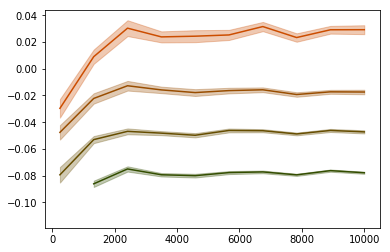

In [87]:
# for ind_enn, enn in enumerate(nns): 

for ind_gam, gam in enumerate(logGams_full):
    color=((ind_gam)*1.0/(len(logGams_full)), 0.3,0)
    means = [np.mean([min_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ]) for enn in range(len(nns))]
    stdev = [np.std([min_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ]) for enn in range(len(nns))]
    n = len([min_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ])
    plt.plot( nns, means, color=color)
    plt.fill_between( nns, means - stdev/np.sqrt(n), means + stdev/np.sqrt(n), alpha = 0.3, color = color)
